In [19]:
# Import libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# To ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [20]:
# Load the dataset (assume the CSV file is named 'weather_data.csv')
df = pd.read_csv('weather_data.csv')

# Convert 'date' to datetime format and preview the dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [21]:
# Convert numerical columns to numeric types (errors coerced to NaN)
num_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with the column median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Map the target variable to binary values
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

# Drop any rows where target is still missing (if any)
df.dropna(subset=['rain_or_not'], inplace=True)

# Check the cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  311 non-null    float64       
 2   humidity         311 non-null    float64       
 3   avg_wind_speed   311 non-null    float64       
 4   rain_or_not      311 non-null    int64         
 5   cloud_cover      311 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 17.1 KB


In [22]:
# Create new features from the date column
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

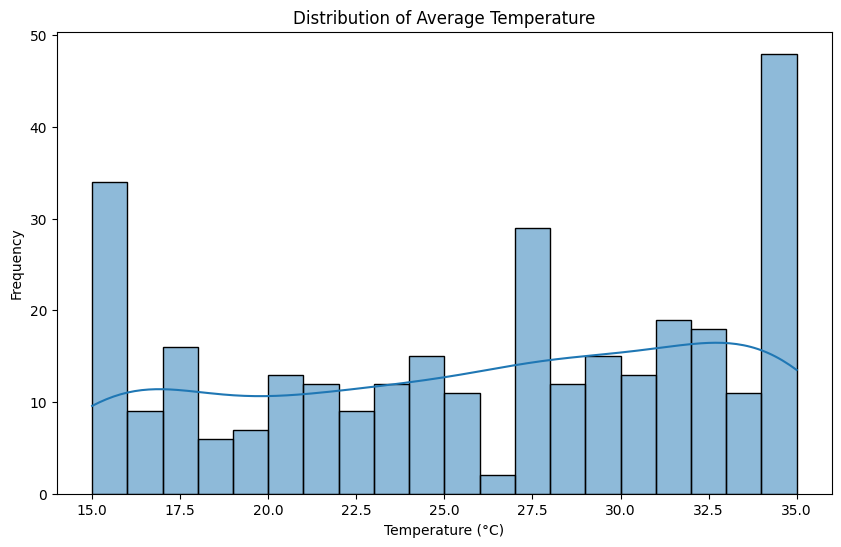

In [23]:
# Distribution of average temperature
plt.figure(figsize=(10,6))
sns.histplot(df['avg_temperature'], bins=20, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

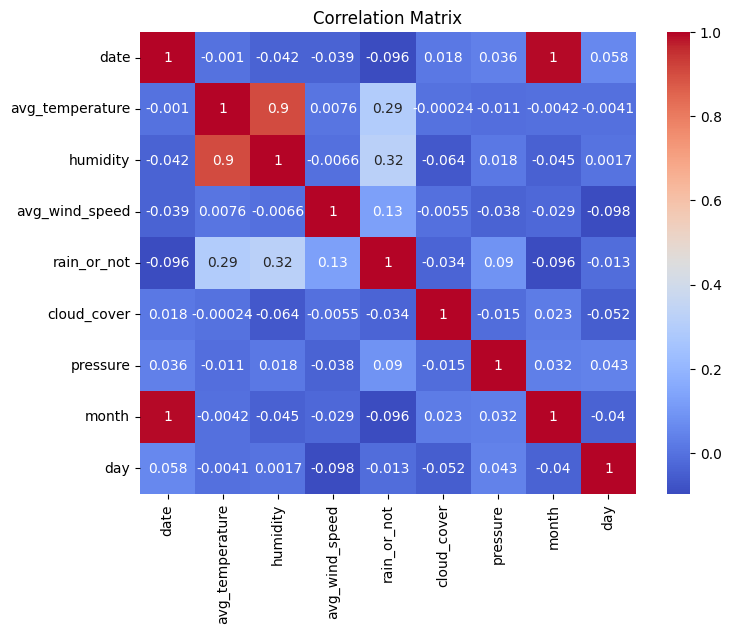

In [24]:
# Compute and plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

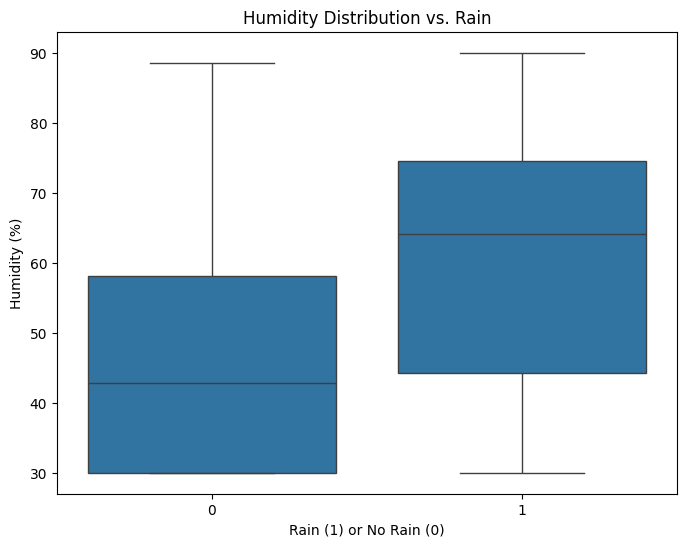

In [25]:
# Example: Boxplot of humidity grouped by rain_or_not
plt.figure(figsize=(8,6))
sns.boxplot(x='rain_or_not', y='humidity', data=df)
plt.title('Humidity Distribution vs. Rain')
plt.xlabel('Rain (1) or No Rain (0)')
plt.ylabel('Humidity (%)')
plt.show()

In [26]:
# Define feature columns and target
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']  # (Include additional features if engineered)
X = df[features]
y = df['rain_or_not']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.6507936507936508
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        22
           1       0.71      0.78      0.74        41

    accuracy                           0.65        63
   macro avg       0.61      0.59      0.60        63
weighted avg       0.64      0.65      0.64        63

Random Forest Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        22
           1       0.68      0.66      0.67        41

    accuracy                           0.57        63
   macro avg       0.53      0.53      0.53        63
weighted avg       0.58      0.57      0.57        63

Decision Tree Accuracy: 0.5079365079365079
              precision    recall  f1-score   support

           0       0.32      0.36      0.34        22
           1       0.63      0.59      0.61        41

    accuracy                           0.51    

In [28]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

# Set up GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.5873015873015873
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        22
           1       0.68      0.68      0.68        41

    accuracy                           0.59        63
   macro avg       0.55      0.55      0.55        63
weighted avg       0.59      0.59      0.59        63


In [29]:
# Example: Create a DataFrame for future 21 days with forecasted features.
# Replace the lists with your actual forecasted values.
future_data = pd.DataFrame({
    'avg_temperature': [25, 26, 24, 23, 27, 28, 26, 25, 24, 26, 27, 25, 24, 28, 26, 27, 25, 26, 24, 25, 27],
    'humidity': [60, 62, 59, 61, 63, 60, 62, 61, 59, 60, 62, 63, 60, 59, 61, 62, 60, 61, 63, 60, 62],
    'avg_wind_speed': [5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5],
    'cloud_cover': [50, 55, 52, 53, 54, 50, 55, 52, 53, 54, 50, 55, 52, 53, 54, 50, 55, 52, 53, 54, 50],
    'pressure': [1010, 1012, 1011, 1013, 1010, 1012, 1011, 1013, 1010, 1012, 1011, 1013, 1010, 1012, 1011, 1013, 1010, 1012, 1011, 1013, 1010]
})

# Predict the probability of rain (1 = rain)
rain_probabilities = best_rf.predict_proba(future_data)[:, 1]
print("Predicted Rain Probabilities for the next 21 days:")
print(rain_probabilities)


Predicted Rain Probabilities for the next 21 days:
[0.73648442 0.78290747 0.75583344 0.67758782 0.77151451 0.73647213
 0.78290747 0.76214736 0.75481303 0.73914672 0.76744719 0.79089609
 0.75481303 0.74289418 0.76282443 0.75933691 0.74657215 0.75915874
 0.80724724 0.73948228 0.75642678]
